# IMPORT

In [67]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

# PLOTS

In [68]:
def plotBoxplot(data,name,k):
    quartiles = [[list()] * 5] * 16
    for ai in range(len(data)):
        a = data[ai]
        x = round(np.sqrt(len(a))) 
        y = ceil(len(a)/x)
        
        for di in range(len(a)):
            d = a[di]
            plt.subplot(x, y, di+1)

            [q1,q2,q3] = np.percentile(d,[25, 50, 75])
            iqr = q3-q1
            whis = 1.5
            q0 = q1 - whis*iqr
            q4 = q3 + whis*iqr

            quartiles[ai][di] = [q0,q1,q2,q3,q4]
            plt.boxplot(d,whis=whis)

            plt.title(name[:3] + ' act ' + str(ai) + ' dev ' + str(di))
        
        plt.subplots_adjust(hspace=0.4,wspace=0.3)

        plt.savefig('Plots/' + name + '/'+str(k)+'-' + name.lower() + '-' + str(ai) + '.jpg')

        # plt.show()

    return quartiles

# READ FILE

In [69]:
dir_files = "../Dataset/"
            # rows = np.list(csv_reader).astype(np.float)

def readFiles():
    part = dict()
    for i in range(1):
        for d in range(1,6):
            file_name = dir_files + "part" + str(i) + "/part" + str(i) + "dev" + str(d) + ".csv"
            csv_file = open(file_name)
            csv_reader = csv.reader(csv_file, delimiter=',')
            rows = np.array(list(csv_reader))
            
            if(d == 1):
                part[i] = list([rows])
            else:
                part[i].append(rows)
        
        part[i]=np.array([np.array(xi).astype(float) for xi in part[i]])

    return part
part = readFiles()

# OUTLIERS

In [72]:
def outliersDensity(data,quartiles):
    density = [[list()] * 5] * 16
    for ai in range(len(data)):
        a = data[ai]

        for di in range(len(a)):
            d = a[di]
            q = quartiles[ai][di]

            outliers_minus = np.where(d < q[0])[0]
            outliers_plus = np.where(d > q[4])[0]

            outliers = np.concatenate((d[outliers_minus],d[outliers_plus]))

            density[ai][di] = len(outliers) / len(d) * 100
    
    return density
            

# BOXPLOT

[6.12967582319963, 9.282667233319874, 10.120929042335984, 11.38466150673337, 14.537652916853613] [15.71866535]
[5.503804131084781, 8.990929955646674, 9.894118485746974, 11.315680505354603, 14.802806329916496] [15.29421104 16.08062268 15.23795488]
[5.548475469976789, 8.71765723658124, 9.884605943228086, 10.830445080984209, 13.999626847588662] [14.23219166 15.19030736 14.11923257]
[5.363857432182197, 9.008077673109216, 10.050053046208264, 11.43755783372723, 15.081778074654249] [15.65850844 16.87920701 15.46205941 15.15985529 15.31668365]
[2.7733071169058174, 9.48031661631521, 10.383951355818267, 13.95165628258814, 20.658665781997534] [ 1.38867051  2.13937844  2.71672724 23.19018618 23.76869748 24.34801865
 24.35478257 25.88274673 26.37446525 21.86846604 25.09907427 20.77838413
 22.14724577 22.83836909 24.4865298  26.39624605 29.38586945 27.85627472
 24.80252352 21.58342491 23.36791309]
[6.12967582319963, 9.282667233319874, 10.120929042335984, 11.38466150673337, 14.537652916853613] [15.71

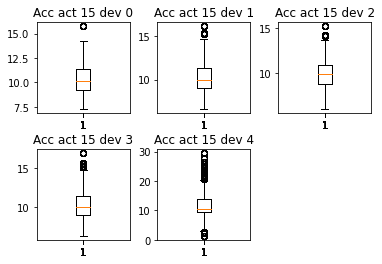

In [73]:
def boxplot(part):

    for k in part.keys():
        acc = [[list()] * 5] * 16
        gyr = [[list()] * 5] * 16
        mag = [[list()] * 5] * 16

        i = part[k]
        for di in range(len(i)):
            d = i[di]
            for a in range(1,17):
                pos = np.where(d[:,11] == a)[0]

                acc[a-1][di] = np.sqrt(d[pos,1]**2 + d[pos,2]**2 + d[pos,3]**2)

                gyr[a-1][di] = np.sqrt(d[pos,4]**2 + d[pos,5]**2 + d[pos,6]**2)

                mag[a-1][di] = np.sqrt(d[pos,7]**2 + d[pos,8]**2 + d[pos,9]**2)
                
        quartiles_acc = plotBoxplot(acc, "Accelerometer", k)

        density = outliersDensity(acc,quartiles_acc)

        # quartiles_gyr = plotBoxplot(gyr, "Gyroscope", k)
        
        # quartiles_mag = plotBoxplot(mag, "Magnemometer", k)


boxplot(part)